In [1]:
#先灌好 scikit-learn 指令 !pip install Scikit-learn
#!pip list graphviz

In [2]:
#先拿取資料, 這邊是用 sklearn拿資料
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#所有資料都要用 pandas整理成固定格式以便後續應用
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"] #把 target 放置到 df 表內
#df.to_csv("iris.csv", encoding="utf-8", index = False) #輸出成excel檔案的指令
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


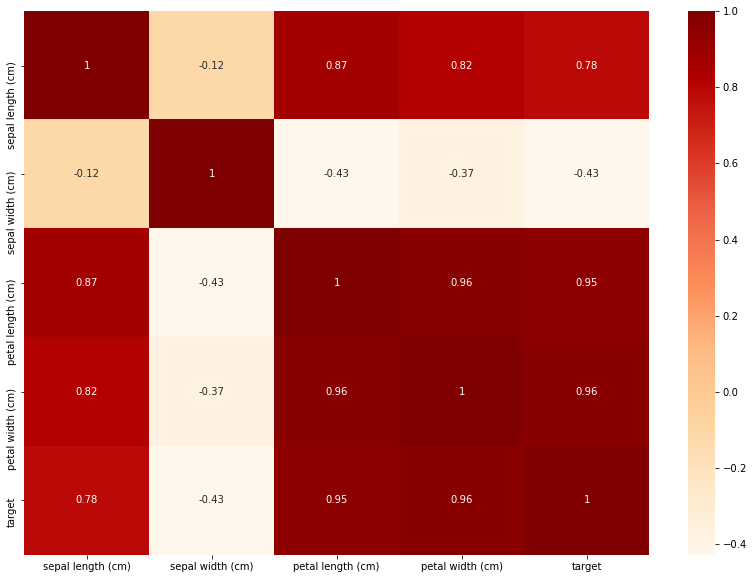

In [4]:
#視覺化, 相關係數圖, 下面改名入境隨俗 照著做
import matplotlib.pyplot as plt
import seaborn as sns #matplotlib裡面的進階函式, 劃出一個漂亮的圖
#這個意思是只要有圖，最後就幫我顯示出來，不用再打 plt.show
%matplotlib inline
#圖大小設定 寬, 高
plt.figure(figsize=(14, 10))
#sns.heatmap 做熱度圖 , df.astype("float") 一般都是用小數點做所以習慣做成小數點 float比較好處理; annot這個參數是只在上面打上標誌
sns.heatmap(df.astype("float").corr(), cmap="OrRd", annot=True)

In [5]:
#相關係數, 做出來之後發現 target最有相關的是0.95 就是 petal width
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
# setp1. 先切割資料, 切成 90%要用來訓練, 10%用來測試, 
#從 sklearn函式裡面 import train_test_split 訓練測試資料-->執行結果會出現一個 Tuple 型試，(特徵90%, 特徵10%, 目標90%, 目標10%)
from sklearn.model_selection import train_test_split
#資料處理時，要先給train_test_split X軸資訊, 在Y軸資訊。df裡面的target這一行先去除, axis=0是去除掉一個橫列, axis=1是去除掉一個直行 , 不改舊的,回傳新的, test_size 是指10%拿來測試
# train_test_split(X座標, Y座標, 多少比例操作,9/1? 8/2 7/3? 9/1時是用0.1), 每次split都是亂數, 每次做出來都不同
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)


In [7]:
#setp2. 開始訓練, 由於 x_train, y_train是拿來訓練的,所以就拿這兩個來訓練
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3) #讓決策樹誕生在這個世界上
clf.fit(x_train, y_train) #訓練完

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

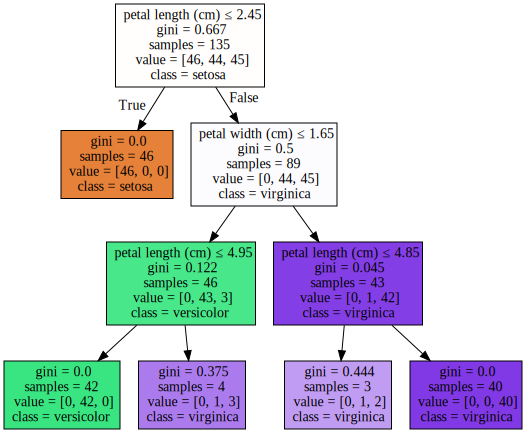

In [8]:
#畫樹
from sklearn.tree import export_graphviz
import graphviz
#先告訴他訓練完的資料是 clf, out_file=None 不要輸出資料, feature_name和 class_names丟給他, filled=True 填入顏色, 可以弄比較漂亮, sepcial_characters=True 如果有些特別特色也顯示出來 
g = export_graphviz(clf, out_file=None, feature_names=iris["feature_names"], 
               class_names=iris["target_names"], filled=True, special_characters=True)
#產生方格續敘述圖
graph = graphviz.Source(g)
graph

In [9]:
#預測 把 x測試資料丟給他做預測;
pre = clf.predict(x_test)
print("預測結果:", list(pre))
print("真正標籤:", list(y_test))

預測結果: [1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2]
真正標籤: [1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2]


In [10]:
#算出正確率, 給正常人看得
from sklearn.metrics import accuracy_score
print("預測成功機率:",accuracy_score(y_test, pre))

預測成功機率: 0.9333333333333333


In [11]:
#算出對在哪裡 錯在哪裡, 別是斜線的地方就是電腦預測錯誤的地方, y_test是正確的資訊, 放在X軸, pre是預測的資訊 放在Y軸, 這是給專業人看得
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre)) #轉化成dataframe比較好看, 要存檔請參考 pd.to_csv("iris.csv", encoding="utf-8", index=False)

,0,1,2
0,4,0,0
1,0,5,1
2,0,0,5


# Summary:
+ 我們可以用花瓣寬度(pteal width)來對一堆鳶尾花做分類
    花瓣寬度<0.8cm的可歸類為山鳶尾(setosa), 而剩下另外一堆叫做B
+ B裡面我們可以用花瓣寬度(petal width)來分辨, 當花瓣寬度<1.75cm時
    有八成可以分辨出是變色鳶尾(versicolor), 出錯率約2成
    而另外的花瓣寬度>1.75cm時，就歸類為維吉尼亞(viginica)